## Басс Вадим 1 вариант E-commerce

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


import datetime as dt
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from operator import attrgetter

In [2]:
olist_customers = pd.read_csv('olist_customers_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')

In [3]:
# olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
# customer_id — позаказный идентификатор пользователя
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
# order_id —  уникальный идентификатор заказа (номер чека)
# order_item_id —  идентификатор товара внутри одного заказа
# product_id —  идентификатор товара (аналог штрихкода)
# seller_id — ид производителя товара
# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price —  цена за единицу товара
#freight_value —  вес товара

olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# olist_orders_dataset.csv —  таблица заказов
# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id —  позаказный идентификатор пользователя
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки

olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

In [6]:
# Смотрим, какие статусы у заказов (отбор будет вестись по доставленным заказам пользователю)
# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт
# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён
olist_orders.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [7]:
# Ведем отбор статусов заказов, доставленных пользователю
olist_orders_delivered = olist_orders.query('order_status in "delivered"')
olist_orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
#Теперь работаем с уникальными id пользователей (customer_unique_id) в таблице olist_customers

In [9]:
# Выделяем уникальных пользователей и таблицы olist_customers, и затем мерджим с таблицей olist_orders_delivered (отбор статусов заказов, доставленных пользователю)
unique_customers = olist_customers[['customer_unique_id', 'customer_id']]
unique_customers.head()

,customer_unique_id,customer_id
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad


In [10]:
olist_orders_with_unique_id = pd.merge(olist_orders_delivered, unique_customers, how='left')
olist_orders_with_unique_id.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


In [11]:
olist_orders_with_unique_id.order_status.value_counts()

order_status
delivered    96478
Name: count, dtype: int64

In [12]:
# Для случая с УНИКАЛЬНЫМИ ИДЕНТИФИКАТОРАМИ ПОЛЬЗОВАТЕЛЕЙ (customer_unique_id - аналог номера паспорта )
# Далее замердженную таблицу группируем по уникальным идентификаторам пользователей (customer_unique_id) 
# и аггрегируем по id заказов (order_id - уникальный идентификатор заказа (обозначаю количество заказов))

In [13]:
olist_orders_with_unique_id_grouped = olist_orders_with_unique_id.groupby('customer_unique_id', as_index=False)\
                                        .agg({'order_id': 'count'})
olist_orders_with_unique_id_grouped

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


In [14]:
olist_orders_with_unique_id_grouped.query('order_id == 1')
# Склоняюсь к этому ответу (так как брал уникальные айдишники)
# Ответ 90557

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [15]:
olist_orders.order_status.value_counts()
# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт
# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён


# В задании работаю с отмененными и недоступными заказами, остальные в эту категорию не включаю, так как по ним ведется работа.
# Остальные заказы могут доставить, следовательно некорректно ввести их в общую 'массу' недоставленных заказов

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [16]:
olist_orders_canceled = olist_orders.query('order_status in ("unavailable", "canceled")')
olist_orders_canceled.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00


In [17]:
# Группирую по отмененным видам заказов и аггрегирую по номерам чеков (order_id)
Canceled = olist_orders_canceled.groupby('order_status', as_index=False) \
                .agg({'order_id' : 'count'})
Canceled

,order_status,order_id
0,canceled,625
1,unavailable,609


In [18]:
olist_orders_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 266 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       1234 non-null   object
 1   customer_id                    1234 non-null   object
 2   order_status                   1234 non-null   object
 3   order_purchase_timestamp       1234 non-null   object
 4   order_approved_at              1093 non-null   object
 5   order_delivered_carrier_date   75 non-null     object
 6   order_delivered_customer_date  6 non-null      object
 7   order_estimated_delivery_date  1234 non-null   object
dtypes: object(8)
memory usage: 86.8+ KB


In [21]:
olist_orders_canceled['order_estimated_delivery_date'] = pd.to_datetime(
    olist_orders_canceled['order_estimated_delivery_date'].str.split(' ').str[0], #Удаляем время из строки
    format='%Y-%m-%d',
    errors='coerce'
)

C:\Users\Вадим\AppData\Local\Temp\ipykernel_20352\880964584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_orders_canceled['order_estimated_delivery_date'] = pd.to_datetime(


In [22]:
olist_orders_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 266 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1234 non-null   object        
 1   customer_id                    1234 non-null   object        
 2   order_status                   1234 non-null   object        
 3   order_purchase_timestamp       1234 non-null   object        
 4   order_approved_at              1093 non-null   object        
 5   order_delivered_carrier_date   75 non-null     object        
 6   order_delivered_customer_date  6 non-null      object        
 7   order_estimated_delivery_date  1234 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 86.8+ KB


In [23]:
olist_orders_canceled.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05


In [24]:
olist_orders_canceled['year'] = pd.DatetimeIndex(olist_orders_canceled['order_estimated_delivery_date']).year

C:\Users\Вадим\AppData\Local\Temp\ipykernel_20352\493240334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_orders_canceled['year'] = pd.DatetimeIndex(olist_orders_canceled['order_estimated_delivery_date']).year


In [25]:
olist_orders_canceled['All_month_name'] = olist_orders_canceled.order_estimated_delivery_date.dt.month_name()

C:\Users\Вадим\AppData\Local\Temp\ipykernel_20352\275784129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_orders_canceled['All_month_name'] = olist_orders_canceled.order_estimated_delivery_date.dt.month_name()


In [26]:
olist_orders_canceled.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,All_month_name
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05,2017,December
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14,2018,August
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16,2018,February
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22,2018,February
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05,2017,September


In [27]:
Otmena = olist_orders_canceled.groupby(['year','All_month_name'], as_index = False).agg({'order_id' : 'count'})
Otmena.head()

,year,All_month_name,order_id
0,2016,December,10
1,2016,November,19
2,2016,October,3
3,2016,September,1
4,2017,April,41


In [28]:
# В среднем сколько не пришло заказов исходя из обещанной даты доставки  по месяцам в среднем (считал по каждому месяцу)
Otvet2 = Otmena.groupby(['All_month_name'], as_index = False).agg({'order_id' : 'mean'})
Otvet2

,All_month_name,order_id
0,April,34.500000
1,August,83.000000
2,December,53.000000
3,February,38.000000
4,January,51.000000
5,July,44.000000
6,June,38.000000
7,March,107.000000
8,May,38.500000
9,November,42.333333


In [29]:
olist_orders_canceled.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,All_month_name
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05,2017,December
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14,2018,August
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16,2018,February
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22,2018,February
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05,2017,September


In [30]:
# Группа с недоступными заказами (unavailable —  недоступен) по месяцам
Unavailable_olist_orders_canceled = olist_orders_canceled.query('order_status == "unavailable"')
Unavailable = Unavailable_olist_orders_canceled.groupby(['year','All_month_name'], as_index = False).agg({'order_id' : 'count'})
Unavailable_Otvet2 = Unavailable.groupby(['All_month_name'], as_index = False).agg({'order_id' : 'mean'})
Unavailable_Otvet2

,All_month_name,order_id
0,April,15.0
1,August,32.5
2,December,35.5
3,February,21.0
4,January,44.0
5,July,20.5
6,June,18.0
7,March,50.0
8,May,14.0
9,November,38.5


In [31]:
# Группа с отмененными заказами (canceled —  отменён) по месяцам
Сanceled_olist_orders_canceled = olist_orders_canceled.query('order_status == "canceled"')
Сanceled = Сanceled_olist_orders_canceled.groupby(['year','All_month_name'], as_index = False).agg({'order_id' : 'count'})
Сanceled_Otvet2 = Сanceled.groupby(['All_month_name'], as_index = False).agg({'order_id' : 'mean'})
Сanceled_Otvet2

,All_month_name,order_id
0,April,19.500000
1,August,50.500000
2,December,17.500000
3,February,17.000000
4,January,7.000000
5,July,23.500000
6,June,20.000000
7,March,57.000000
8,May,24.500000
9,November,16.666667


In [32]:
# Средние значения среди всех недоступных и отмененных значений по месяцам ()
print(Сanceled_Otvet2['order_id'].mean())
print(Unavailable_Otvet2['order_id'].mean())
# canceled —  отменён
# unavailable —  недоступен

24.124999999999996
30.333333333333332


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [33]:
# olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
# order_id —  уникальный идентификатор заказа (номер чека)
# order_item_id —  идентификатор товара внутри одного заказа
# product_id —  идентификатор товара (аналог штрихкода)
# seller_id — ид производителя товара
# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price —  цена за единицу товара
#freight_value —  вес товара

olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [34]:
# olist_orders_dataset.csv —  таблица заказов
# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id —  позаказный идентификатор пользователя
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки

olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [35]:
# Идентификаторы пользователей с заказами
olist_customer_with_order = pd.merge(olist_orders, olist_order_items, how='left')
olist_customer_with_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [36]:
olist_customer_with_order.shape

(113425, 14)

In [37]:
olist_customer_with_order['order_approved_at']

0         2017-10-02 11:07:15
1         2018-07-26 03:24:27
2         2018-08-08 08:55:23
3         2017-11-18 19:45:59
4         2018-02-13 22:20:29
                 ...         
113420    2018-02-06 13:10:37
113421    2017-08-27 15:04:16
113422    2018-01-08 21:36:21
113423    2018-01-08 21:36:21
113424    2018-03-09 11:20:28
Name: order_approved_at, Length: 113425, dtype: object

In [38]:
olist_customer_with_order['order_approved_at']

0         2017-10-02 11:07:15
1         2018-07-26 03:24:27
2         2018-08-08 08:55:23
3         2017-11-18 19:45:59
4         2018-02-13 22:20:29
                 ...         
113420    2018-02-06 13:10:37
113421    2017-08-27 15:04:16
113422    2018-01-08 21:36:21
113423    2018-01-08 21:36:21
113424    2018-03-09 11:20:28
Name: order_approved_at, Length: 113425, dtype: object

In [40]:
olist_customer_with_order['order_approved_at'] = pd.to_datetime(
    olist_customer_with_order['order_approved_at'].str.split(' ').str[0], # Извлекаем только дату
    format='%Y-%m-%d',
    errors='coerce' # Обработка некорректных значений
)

In [41]:
olist_customer_with_order['order_approved_at']

0        2017-10-02
1        2018-07-26
2        2018-08-08
3        2017-11-18
4        2018-02-13
            ...    
113420   2018-02-06
113421   2017-08-27
113422   2018-01-08
113423   2018-01-08
113424   2018-03-09
Name: order_approved_at, Length: 113425, dtype: datetime64[ns]

In [42]:
olist_customer_with_order['Day_order_approved_at_name'] = pd.DatetimeIndex(olist_customer_with_order['order_approved_at']).day_name()
olist_customer_with_order['Day_order_purchase_timestamp_name'] = pd.DatetimeIndex(olist_customer_with_order['order_purchase_timestamp']).day_name()


In [43]:
olist_customer_with_order
# order_purchase_timestamp —  время создания заказа (Day_order_purchase_timestamp_name)
# order_approved_at —  время подтверждения оплаты заказа (Day_order_approved_at_name)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Day_order_approved_at_name,Day_order_purchase_timestamp_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday,Tuesday
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday,Sunday
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday,Monday
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday,Monday


In [44]:
olist_customer_with_order['Day_order_approved_at_name']

0            Monday
1          Thursday
2         Wednesday
3          Saturday
4           Tuesday
            ...    
113420      Tuesday
113421       Sunday
113422       Monday
113423       Monday
113424       Friday
Name: Day_order_approved_at_name, Length: 113425, dtype: object

In [45]:
# Группировка по времени подтверждения оплаты заказа (Day_order_approved_at_name)
Gr_day_order_approved_at_name = olist_customer_with_order.groupby(['product_id', 'Day_order_approved_at_name'], as_index = False) \
                           .agg({'price': 'count'})
Gr_day_order_approved_at_name.head()

,product_id,Day_order_approved_at_name,price
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [46]:
# Группировка по времени создания заказа (Day_order_purchase_timestamp_name)
Gr_day_order_purchase_timestamp_name = olist_customer_with_order.groupby(['product_id', 'Day_order_purchase_timestamp_name'], as_index = False) \
                           .agg({'price': 'count'})
Gr_day_order_purchase_timestamp_name.head()

,product_id,Day_order_purchase_timestamp_name,price
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [47]:
Oplata = Gr_day_order_approved_at_name.pivot(index='product_id', columns='Day_order_approved_at_name', values='price').reset_index()
Oplata.head()

Day_order_approved_at_name,product_id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,00066f42aeeb9f3007548bb9d3f33c38,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,00088930e925c41fd95ebfe695fd2655,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,0009406fd7479715e4bef61dd91f2462,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,000b8f95fcb9e0096488278317764d19,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,000d9be29b5207b54e86aa1b1ac54872,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [48]:
Sozdanie = Gr_day_order_purchase_timestamp_name.pivot(index='product_id', columns='Day_order_purchase_timestamp_name', values='price').idxmax(axis=1).reset_index()
Sozdanie = Sozdanie.rename(columns={0:'purchase_day'})
Sozdanie.head()

,product_id,purchase_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

In [49]:
olist_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [50]:
# Отбираю пользователей, которым поступили заказы
olist_orders_delivered = olist_orders.query('order_status == "delivered"')

In [51]:
olist_orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [52]:
# Замерджил таблицу заказов доставленных с таблицей уникальных идентификаторов пользователей
Pokypki_i_polzovateli = olist_orders_delivered.merge(olist_customers, how='left', on='customer_id')
Pokypki_i_polzovateli.head()

# olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
# olist_orders_dataset.csv —  таблица заказов

# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id — позаказный идентификатор пользователя
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

# order_id —  уникальный идентификатор заказа (номер чека)
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_id — позаказный идентификатор пользователя
# order_purchase_timestamp —  время создания заказа


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [53]:
# Выбрал данные с таблицы по основным рабочим позициям
Pokypki_i_polzovateli = Pokypki_i_polzovateli[["customer_unique_id", 
                                               "order_approved_at", 
                                               "order_id", 
                                               "order_status"]]
Pokypki_i_polzovateli.head()

,customer_unique_id,order_approved_at,order_id,order_status
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7,delivered
1,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,53cdb2fc8bc7dce0b6741e2150273451,delivered
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,47770eb9100c2d0c44946d9cf07ec65d,delivered
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,949d5b44dbf5de918fe9c16f97b45f8a,delivered
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,ad21c59c0840e6cb83a9ceb5573f8159,delivered


In [54]:
# Удалил строки с NaN dropna()
Pokypki_i_polzovateli_1 = Pokypki_i_polzovateli.dropna()
Pokypki_i_polzovateli_1.head()

,customer_unique_id,order_approved_at,order_id,order_status
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7,delivered
1,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,53cdb2fc8bc7dce0b6741e2150273451,delivered
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,47770eb9100c2d0c44946d9cf07ec65d,delivered
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,949d5b44dbf5de918fe9c16f97b45f8a,delivered
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,ad21c59c0840e6cb83a9ceb5573f8159,delivered


In [55]:
# Тип данных
Pokypki_i_polzovateli_1.dtypes

customer_unique_id    object
order_approved_at     object
order_id              object
order_status          object
dtype: object

In [57]:
# Поменял формат данных на datetime
Pokypki_i_polzovateli_1['order_approved_at'] = pd.to_datetime(
    Pokypki_i_polzovateli_1['order_approved_at'].str.split(' ').str[0], # Извлечение только даты
    errors='coerce'
)

C:\Users\Вадим\AppData\Local\Temp\ipykernel_20352\395048602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pokypki_i_polzovateli_1['order_approved_at'] = pd.to_datetime(


In [58]:
Pokypki_i_polzovateli_1["Year_Month"] = Pokypki_i_polzovateli_1["order_approved_at"].dt.to_period('M')

C:\Users\Вадим\AppData\Local\Temp\ipykernel_20352\1922996196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pokypki_i_polzovateli_1["Year_Month"] = Pokypki_i_polzovateli_1["order_approved_at"].dt.to_period('M')


In [59]:
Pokypki_i_polzovateli_1.head()


,customer_unique_id,order_approved_at,order_id,order_status,Year_Month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07-26,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02


In [60]:
user_avg_purchases = Pokypki_i_polzovateli_1.groupby(["customer_unique_id", "Year_Month"], as_index=False) \
                                               .agg({"order_id": "count"}) \
                                               .rename(columns={"order_id": "quantity"}) \
                                               .sort_values("Year_Month", ascending=False)

In [61]:
user_avg_purchases['week_in_month'] = round(user_avg_purchases.Year_Month.dt.daysinmonth / 7, 2)


In [62]:
user_avg_purchases["avg_purchase_by_week"] = round(user_avg_purchases.quantity / user_avg_purchases.week_in_month, 2)


In [63]:
user_avg_purchases


,customer_unique_id,Year_Month,quantity,week_in_month,avg_purchase_by_week
51097,8987280b085470a9fb0ee97d75342411,2018-08,1,4.43,0.23
71328,bf8679a3ec7925ac3dc88943877facde,2018-08,1,4.43,0.23
80249,d78075a356a269e08de61798fd11a84a,2018-08,1,4.43,0.23
95131,ffe204b1bb8026741b839085b2fd10f2,2018-08,1,4.43,0.23
51103,898a3ab803ea2aea5757bf334f8d559d,2018-08,1,4.43,0.23
...,...,...,...,...,...
85867,e6a1d274cbba12da4cd29eb462b34be5,2016-10,1,4.43,0.23
70936,be8375783b7439dd7ef30b89fb46188b,2016-10,1,4.43,0.23
66375,b2272a60af3b7f5afe04c6cbf1dcfb15,2016-10,1,4.43,0.23
72,0032c76b20340da25249092a268ce66c,2016-10,1,4.43,0.23


## 5.1. Выполните когортный анализ пользователей.

## 5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут. Для визуализации когортной таблицы рекомендуем использовать пример из 8-го урока python, раздел “Стильный урок”, степ 5. (15 баллов)

In [64]:
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [65]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [66]:
users_and_orders = olist_customers.merge(olist_orders, on="customer_id")
users_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [67]:
users_and_orders_delivered = users_and_orders[["customer_unique_id", 
                                               "order_approved_at", 
                                               "order_id", 
                                               "order_status"]] \
                                               .query("order_status == 'delivered'") \
                                               .dropna()

In [68]:
users_and_orders_delivered

,customer_unique_id,order_approved_at,order_id,order_status
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,00e7ee1b050b8499577073aeb2a297a1,delivered
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,29150127e6685892b6eab3eec79f59c7,delivered
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,951670f92359f4fe4a63112aa7306eba,delivered
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 16:08:45,6760e20addcf0121e9d58f2f1ff14298,delivered
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:35:12,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:30:03,fed4434add09a6f332ea398efd656a5c,delivered
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,e31ec91cea1ecf97797787471f98a8c2,delivered


In [69]:
users_and_orders_delivered.dtypes

customer_unique_id    object
order_approved_at     object
order_id              object
order_status          object
dtype: object

In [70]:
users_and_orders_delivered

,customer_unique_id,order_approved_at,order_id,order_status
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,00e7ee1b050b8499577073aeb2a297a1,delivered
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,29150127e6685892b6eab3eec79f59c7,delivered
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,951670f92359f4fe4a63112aa7306eba,delivered
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 16:08:45,6760e20addcf0121e9d58f2f1ff14298,delivered
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:35:12,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:30:03,fed4434add09a6f332ea398efd656a5c,delivered
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,e31ec91cea1ecf97797787471f98a8c2,delivered


In [71]:
users_and_orders_delivered['order_approved_at'] = pd.to_datetime(users_and_orders_delivered.order_approved_at, format = '%Y-%m-%d %H:%M:%S')

In [72]:
users_and_orders_delivered.head()

,customer_unique_id,order_approved_at,order_id,order_status
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,00e7ee1b050b8499577073aeb2a297a1,delivered
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,29150127e6685892b6eab3eec79f59c7,delivered
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,951670f92359f4fe4a63112aa7306eba,delivered
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered


In [73]:
users_and_orders_delivered.dtypes

customer_unique_id            object
order_approved_at     datetime64[ns]
order_id                      object
order_status                  object
dtype: object

In [74]:
users_and_orders_delivered_1 = users_and_orders_delivered .query("'2017-01-01 00:00:00' <=order_approved_at <= '2017-12-31 23:59:59'").dropna()

In [75]:
users_and_orders_delivered_1

,customer_unique_id,order_approved_at,order_id,order_status
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,00e7ee1b050b8499577073aeb2a297a1,delivered
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:25:11,5741ea1f91b5fbab2bd2dc653a5b5099,delivered
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:55:41,1093c8304c7a003280dd34598194913d,delivered
10,2a7745e1ed516b289ed9b29c7d0539a5,2017-11-27 18:01:20,8428e578bb1cf839ae26a6b7615502b9,delivered
12,918dc87cd72cd9f6ed4bd442ed785235,2017-09-09 10:10:17,83d8f70418eefd96f37b483dff430305,delivered
...,...,...,...,...
99430,277490f0d435b602fe4475d4b89e9181,2017-05-25 02:50:25,326c29ec5b89834b17aea7d85302fd70,delivered
99433,e7f8760e2bbd2f1986bebd99596c088e,2017-03-15 21:04:08,ec3a75fb0ac595e461765d2d854b1d08,delivered
99435,4b5820135d360a45552b5163835b1d89,2017-12-18 00:17:27,c9aea907527f5d4f5fb44955c18a79fb,delivered
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,e31ec91cea1ecf97797787471f98a8c2,delivered


In [76]:
users_and_orders_delivered_1 = users_and_orders_delivered_1[["customer_unique_id", "order_approved_at"]]

In [77]:
users_and_orders_delivered_1

,customer_unique_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:25:11
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:55:41
10,2a7745e1ed516b289ed9b29c7d0539a5,2017-11-27 18:01:20
12,918dc87cd72cd9f6ed4bd442ed785235,2017-09-09 10:10:17
...,...,...
99430,277490f0d435b602fe4475d4b89e9181,2017-05-25 02:50:25
99433,e7f8760e2bbd2f1986bebd99596c088e,2017-03-15 21:04:08
99435,4b5820135d360a45552b5163835b1d89,2017-12-18 00:17:27
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20


In [78]:
users_and_orders_delivered_1['month'] = users_and_orders_delivered_1['order_approved_at'].dt.to_period('M')
users_and_orders_delivered_1['cohort'] = users_and_orders_delivered_1.groupby('customer_unique_id')['order_approved_at'] \
                         .transform('min') \
                         .dt.to_period('M')

C:\Users\Вадим\AppData\Local\Temp\ipykernel_20352\2334515675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_and_orders_delivered_1['month'] = users_and_orders_delivered_1['order_approved_at'].dt.to_period('M')


In [79]:
users_and_orders_delivered_1

,customer_unique_id,order_approved_at,month,cohort
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05,2017-05
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:25:11,2017-09,2017-09
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:55:41,2017-11,2017-11
10,2a7745e1ed516b289ed9b29c7d0539a5,2017-11-27 18:01:20,2017-11,2017-11
12,918dc87cd72cd9f6ed4bd442ed785235,2017-09-09 10:10:17,2017-09,2017-09
...,...,...,...,...
99430,277490f0d435b602fe4475d4b89e9181,2017-05-25 02:50:25,2017-05,2017-05
99433,e7f8760e2bbd2f1986bebd99596c088e,2017-03-15 21:04:08,2017-03,2017-03
99435,4b5820135d360a45552b5163835b1d89,2017-12-18 00:17:27,2017-12,2017-12
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,2017-11,2017-11


In [80]:
cohort = users_and_orders_delivered_1.groupby(['cohort', 'month'], as_index=False) \
               .agg(user_count=('customer_unique_id', 'nunique'))
cohort['period_number'] = (cohort.month - cohort.cohort).apply(attrgetter('n'))

In [81]:
cohort

,cohort,month,user_count,period_number
0,2017-01,2017-01,684,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
72,2017-10,2017-11,30,1
73,2017-10,2017-12,13,2
74,2017-11,2017-11,6928,0
75,2017-11,2017-12,39,1


In [82]:
cohort_pivot = cohort.pivot_table(index='cohort', columns='period_number', values='user_count')

In [83]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,684.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0
2017-02,1612.0,3.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,NaN
2017-03,2511.0,11.0,9.0,9.0,9.0,4.0,4.0,8.0,7.0,3.0,NaN,NaN
2017-04,2233.0,14.0,5.0,4.0,5.0,6.0,8.0,6.0,8.0,NaN,NaN,NaN
2017-05,3453.0,18.0,16.0,10.0,10.0,11.0,14.0,5.0,NaN,NaN,NaN,NaN
2017-06,3044.0,15.0,12.0,13.0,9.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3710.0,20.0,12.0,7.0,13.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4081.0,28.0,15.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4026.0,27.0,20.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

In [85]:
retention

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,1.0,0.004386,0.002924,0.001462,0.004386,0.001462,0.004386,0.001462,0.001462,NaN,0.002924,0.002924
2017-02,1.0,0.001861,0.002481,0.001861,0.004342,0.001241,0.002481,0.001861,0.000620,0.001861,0.001241,NaN
2017-03,1.0,0.004381,0.003584,0.003584,0.003584,0.001593,0.001593,0.003186,0.002788,0.001195,NaN,NaN
2017-04,1.0,0.006270,0.002239,0.001791,0.002239,0.002687,0.003583,0.002687,0.003583,NaN,NaN,NaN
2017-05,1.0,0.005213,0.004634,0.002896,0.002896,0.003186,0.004054,0.001448,NaN,NaN,NaN,NaN
2017-06,1.0,0.004928,0.003942,0.004271,0.002957,0.003614,0.003614,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005391,0.003235,0.001887,0.003504,0.001887,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006861,0.003676,0.002695,0.003676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006706,0.004968,0.003229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


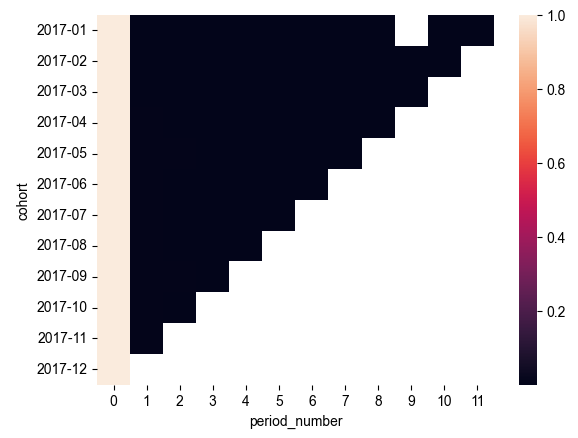

In [86]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(retention)
sns.set(rc = {'figure.figsize':(12,8)})

О когорте с самым высоким retention за третий месяц ответим по сводной таблице retention, этой когорте соответствует когорта 2017-09 со значением 0.004968.

## Задание 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. 
## Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

In [87]:
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [88]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [89]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [90]:
customers_and_orders = olist_customers.merge(olist_orders, on='customer_id')

In [91]:
all_table = customers_and_orders.merge(olist_order_items, on="order_id")

In [92]:
all_table.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [93]:
work_table = all_table.drop_duplicates()

In [94]:
work_table.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [95]:
work_table_1 = work_table.groupby(['order_id', 'order_approved_at', 'customer_unique_id'], as_index = False).agg({'price': lambda x: x.sum()})
work_table_1.head()

,order_id,order_approved_at,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.90


In [96]:
work_table_1['order_approved_at'] = pd.to_datetime(work_table_1.order_approved_at, format = '%Y-%m-%d %H:%M:%S')

In [97]:
NOW = work_table_1['order_approved_at'].max() + timedelta(days=1)
NOW

Timestamp('2018-09-04 17:40:06')

In [98]:
period = 365

In [99]:
work_table_1['DaysSinceOrder'] = work_table_1['order_approved_at'].apply(lambda x: (NOW - x).days)

In [100]:
work_table_1.head()

,order_id,order_approved_at,customer_unique_id,price,DaysSinceOrder
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.90,356
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.90,496
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,199.00,233
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,12.99,27
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.90,577


In [101]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'order_approved_at': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
}
rfm = work_table_1.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'recency', 'order_approved_at': 'frequency'}, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1


In [102]:
rfm['Monetary'] = rfm['customer_unique_id'].apply(lambda x: work_table_1[(work_table_1['customer_unique_id'] == x) & \
                                                           (work_table_1['order_approved_at'] >= NOW - timedelta(days=period))]\
                                                           ['price'].sum())
rfm.head()

,customer_unique_id,recency,frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,0,0.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Calculate the R, F and M scores
At this point, I have the values for Recency, Frequency and Monetary parameters. Each customer will get a note between 1 and 5 for each parameter.
We can do this by setting ranges based on expected behavior. For example, to rate Recency, we could use this scale:
1: 0-30 days
2: 31-60 days
3: 61-90 days
4: 91-180 days
5: 181-365 days

We could also use quintiles. Each quintiles contains 20% of the population. Using quintiles is more flexible as the ranges will adapt to the data and would work across different industries or if there's any change in expected customer behavior.
I am going to use the quintiles method. First, I get the quintiles for each parameter.

In [103]:
quintiles = rfm[['recency', 'frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'frequency': {0.2: 0.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 0.0, 0.4: 42.094000000000015, 0.6: 84.9, 0.8: 149.9}}

In [104]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [105]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [106]:
segt_map = {
    r'[1-2][1-2]': 'Выбросил',
    r'[1-2][3-4]': 'Под риском',
    r'[1-2]5': 'На последнем издыхании',
    r'3[1-2]': 'Полусонные',
    r'33': 'Нуждаются во внимании',
    r'[3-4][4-5]': 'Постоянные клиенты',
    r'41': 'Перспективные',
    r'51': 'Новые клиенты',
    r'[4-5][2-3]': 'Потенциально лояльные',
    r'5[4-5]': 'Лучшие'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,Monetary,R,F,M,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,2,4,Потенциально лояльные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,2,2,Потенциально лояльные
2,0000f46a3911fa3c0805444483337064,542,0,0.00,1,1,1,Выбросил
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,2,2,Выбросил
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,2,5,Выбросил


In [107]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,Monetary,R,F,M,Segment,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,2,4,Потенциально лояльные,424
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,2,2,Потенциально лояльные,422
2,0000f46a3911fa3c0805444483337064,542,0,0.00,1,1,1,Выбросил,111
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,2,2,Выбросил,222
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,2,5,Выбросил,225


In [108]:
rfm_percent = rfm.groupby("Segment", as_index=False) \
              .agg({"RFM_Score": "count"})\
              .sort_values("RFM_Score", ascending=False)

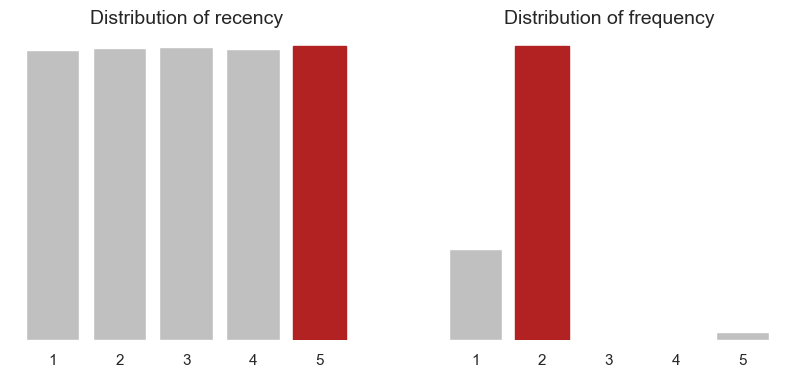

In [109]:
# визуализация frequency по кластерам
# визуализация recency по кластерам
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for i, p in enumerate(['R', 'F']):
    parameters = {'R':'recency', 'F':'frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
plt.show()

 Если посмотреть на стоимость в денежном выражении, то мы видим, что больше всего тратят клиенты с низкой активностью (R и F равны 1-2).

In [110]:
rfm_percent= rfm_percent.assign(RFM_percent = round(rfm_percent.RFM_Score/rfm_percent.RFM_Score.sum()*100, 1))
rfm_percent

,Segment,RFM_Score,RFM_percent
0,Выбросил,37735,39.6
5,Потенциально лояльные,37134,38.9
3,Полусонные,18692,19.6
4,Постоянные клиенты,981,1.0
1,Лучшие,558,0.6
2,На последнем издыхании,307,0.3


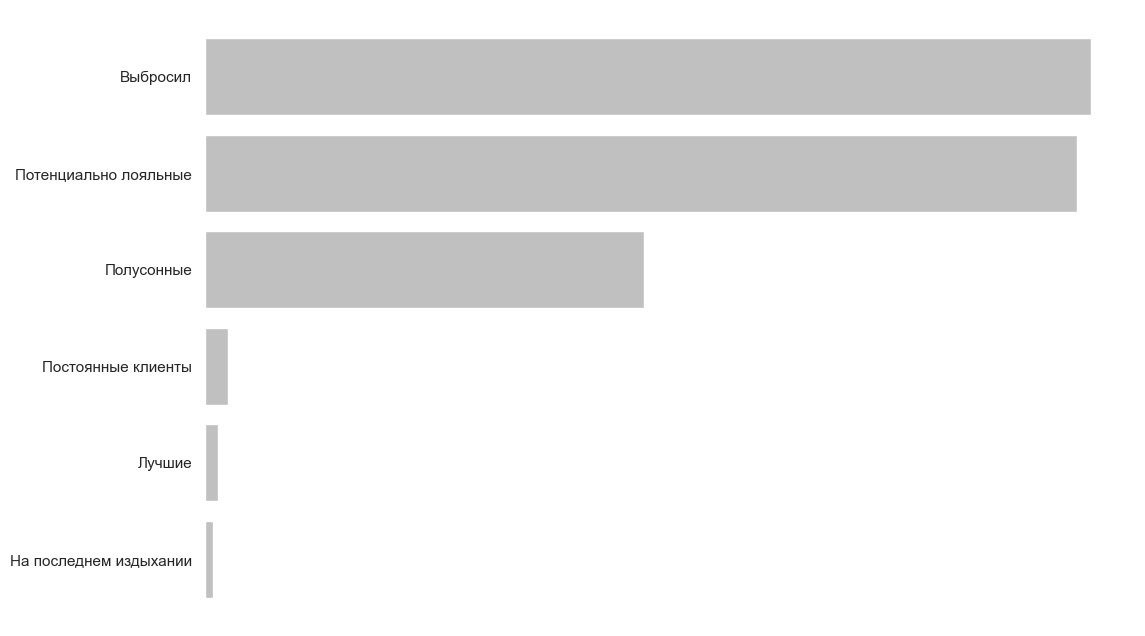

In [111]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

plt.show()

У нас много клиентов, которые покупают у нас нечасто (39,6% (Выбросил)). Однако 38,9% наших клиентов являются либо потенциально лояльными, либо постоянными клиентами (1 %).

Можно провести дальнейший анализ, включающий денежные параметры.
Имея клиентов, распределенных по сегментам, и некоторую статистику о составе нашего клиентского портфеля, мы можем работать над целевыми маркетинговыми кампаниями, чтобы удержать клиентов, которые находятся в группе риска, улучшить продажи потенциальным клиентам и вознаградить лучших клиентов.